# Projeto: previsão de salários - Hourly Wages

In [ ]:
Este notebook implementa um modelo de aprendizado profundo (rede neural) para estimar (prever) o salário por hora de funcionários

## Leitura e preparação dos dados

Leitura do arquivo 'Advertising.csv' utilizando os pandas.

In [2]:
import pandas as pd

# Leitura dos dados do arquivo .csv como dataframe 
df = pd.read_csv("hourly_wages.csv")

In [3]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


## Análise prévia dos dados

Imprime o número de dados non-null (não ausentes) e o tipo de cada atributo.

In [5]:
# Mostra o número de dados non-null (não ausentes) e o tipo de cada atributo
print('Informações sobre os dados:\n')
df.info()
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
df.isnull().sum()

Informações sobre os dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


Soma de dados null (vazios):



wage_per_hour     0
union             0
education_yrs     0
experience_yrs    0
age               0
female            0
marr              0
south             0
manufacturing     0
construction      0
dtype: int64

## Análise (estatística) descritiva dos dados

Análise descritiva dos dados (resumo).

In [6]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Mostra um histograma de salário por hora

O objetivo é comparar com as predições do modelo de rede neural e com o método de regressão linear.

<AxesSubplot:xlabel='wage_per_hour', ylabel='Count'>

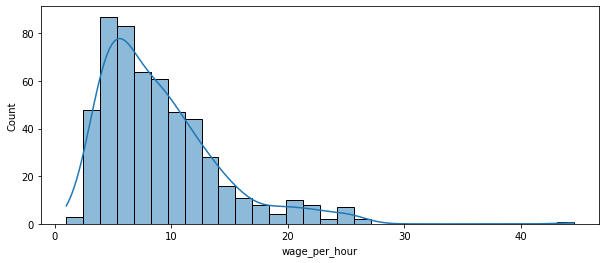

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.histplot(df['wage_per_hour'], kde = True)

## Calcula a correlação entre pares de atributos (colunas)

In [11]:
# Correlação entre salário por hora e educacao
print('Correlação entre salário por hora e educacao: ',df['education_yrs'].corr(df['wage_per_hour']))
# Correlação entre salário por hora e experiencia
print('Correlação entre salário por hora e experiencia: ',df['experience_yrs'].corr(df['wage_per_hour']))
# Correlação entre salário por hora e idade
print('Correlação entre salário por hora e idade: ',df['age'].corr(df['wage_per_hour']))
# Correlação entre salário por hora e sexo
print('Correlação entre salário por hora e sexo: ',df['female'].corr(df['wage_per_hour']))

Correlação entre salário por hora e educacao:  0.3819220698016411
Correlação entre salário por hora e experiencia:  0.08705952539108189
Correlação entre salário por hora e idade:  0.17696688442118433
Correlação entre salário por hora e sexo:  -0.2053705456025712


In [13]:
# Separa os atributos da variável de destino (wage_per_hour)
X = df.drop('wage_per_hour',axis=1).values
y = df['wage_per_hour'].values
print(X.shape)
print(y.shape)

(534, 9)
(534,)


## Divide o conjunto de dados em treino e teste

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Normaliza (padroniza) os dados

Transforma os atributos redimensionando para o intervalo [0,1]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Cria o modelo de rede neural

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Uma camada escondida com 20 neurônios
model.add(Dense(20, input_dim=X_train.shape[1], activation ="relu"))
# Camada de saída
model.add(Dense(1)) # default: função de ativação linear
# Sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compila a rede neural
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## Treinamento da rede neural

In [18]:
history = model.fit(X_train, y_train, epochs=250, batch_size = 5, validation_data=(X_test, y_test))

931 - val_loss: 19.7781 - val_mean_squared_error: 19.7781
Epoch 133/250
80/80 [==============================] - 0s 722us/step - loss: 15.3086 - mean_squared_error: 15.3086 - val_loss: 19.8379 - val_mean_squared_error: 19.8379
Epoch 134/250
80/80 [==============================] - 0s 721us/step - loss: 19.0307 - mean_squared_error: 19.0307 - val_loss: 19.7672 - val_mean_squared_error: 19.7672
Epoch 135/250
80/80 [==============================] - 0s 747us/step - loss: 16.8200 - mean_squared_error: 16.8200 - val_loss: 19.8422 - val_mean_squared_error: 19.8422
Epoch 136/250
80/80 [==============================] - 0s 810us/step - loss: 25.0182 - mean_squared_error: 25.0182 - val_loss: 19.8152 - val_mean_squared_error: 19.8152
Epoch 137/250
80/80 [==============================] - 0s 734us/step - loss: 15.0901 - mean_squared_error: 15.0901 - val_loss: 19.8045 - val_mean_squared_error: 19.8045
Epoch 138/250
80/80 [==============================] - 0s 709us/step - loss: 16.6440 - mean_squar

In [20]:
mse_test = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 750us/step - loss: 20.0627 - mean_squared_error: 20.0627


## Análise da função *loss* (erro/perda)

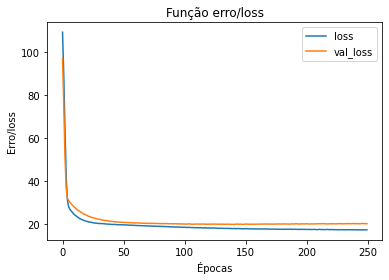

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Erro/loss')
plt.title('Função erro/loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Análise da métrica de desempenho (acurácia)

Vamos observar o desempenho (acurácia) da rede para os dados de treino e de validação/teste.

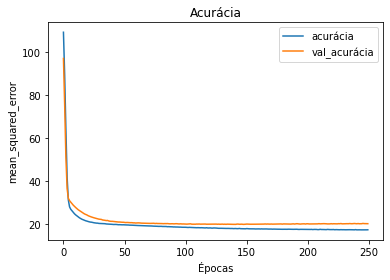

In [22]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'], '')
plt.xlabel("Épocas")
plt.ylabel('mean_squared_error')
plt.title('Acurácia')
plt.legend(['acurácia', 'val_acurácia'])
plt.show()

## Fazendo predições

In [23]:
import numpy as np

predictions = model.predict(X_test)
# 5 primeiros casos do conjunto teste
for i in range(5):
  print('%s => %f (esperado %f)' % (np.round(X_test[i],2).tolist(), predictions[i], y_test[i]))

[0.0, 0.62, 0.82, 0.98, 1.0, 1.0, 0.0, 0.0, 0.0] => 7.427902 (esperado 6.400000)
[0.0, 0.62, 0.05, 0.07, 0.0, 0.0, 0.0, 1.0, 0.0] => 6.960424 (esperado 5.500000)
[0.0, 0.69, 0.13, 0.17, 0.0, 1.0, 1.0, 1.0, 0.0] => 9.526730 (esperado 6.000000)
[0.0, 0.62, 0.36, 0.43, 0.0, 1.0, 0.0, 0.0, 0.0] => 8.825947 (esperado 5.500000)
[1.0, 0.69, 0.15, 0.2, 0.0, 0.0, 0.0, 1.0, 0.0] => 8.960607 (esperado 9.000000)


## Mostra histograma das predições do modelo neural

Mostra histograma das predições de vendas para o conjunto de dados completo com o objetico de comparar com o histograma das vendas real.

<AxesSubplot:ylabel='Count'>

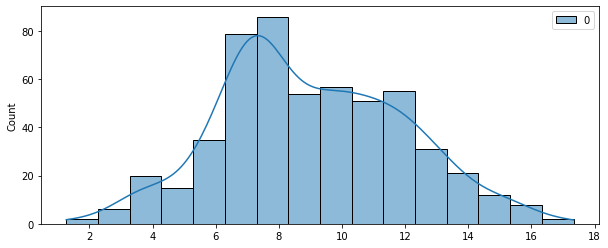

In [24]:
# Normaliza o conjunto X de dados
X_scaled = scaler.transform(X)
# Aplica o modelo
prediction = model.predict(X_scaled)
# plota histograma
plt.figure(figsize=(10,4))
sns.histplot(prediction, kde = True)

## Regressão Linear (Sklearn)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reglin = LinearRegression()
reglin.fit(X_train,y_train)

LinearRegression()

## Aplica o modelo de regressão linear no conjunto teste

In [26]:
y_reglin = reglin.predict(X_test)

## Calcula o erro quadrático médio

In [27]:
print(metrics.mean_squared_error(y_reglin,y_test))

19.163403474272027


## Fazendo predições

In [28]:
predictions_reg = reglin.predict(X_test)
# 5 primeiros casos do conjunto teste
for i in range(5):
  print('%s => %f (esperado %f)' % (np.round(X_test[i],2).tolist(), predictions_reg[i], y_test[i]))

[0.0, 0.62, 0.82, 0.98, 1.0, 1.0, 0.0, 0.0, 0.0] => 9.599256 (esperado 6.400000)
[0.0, 0.62, 0.05, 0.07, 0.0, 0.0, 0.0, 1.0, 0.0] => 8.110460 (esperado 5.500000)
[0.0, 0.69, 0.13, 0.17, 0.0, 1.0, 1.0, 1.0, 0.0] => 9.280246 (esperado 6.000000)
[0.0, 0.62, 0.36, 0.43, 0.0, 1.0, 0.0, 0.0, 0.0] => 9.067475 (esperado 5.500000)
[1.0, 0.69, 0.15, 0.2, 0.0, 0.0, 0.0, 1.0, 0.0] => 11.259330 (esperado 9.000000)


## Mostra histograma das predições da Regressão Linear

Mostra histograma das predições de vendas para o conjunto de dados completo com o objetico de comparar com o histograma das vendas real.

<AxesSubplot:ylabel='Count'>

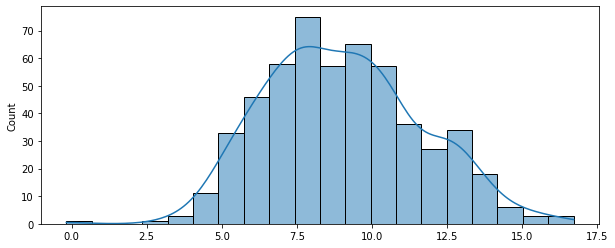

In [29]:
X_scaled = scaler.transform(X)
predictions_reg2 = reglin.predict(X_scaled)
plt.figure(figsize=(10,4))
sns.histplot(predictions_reg2, kde = True)